prompt: 구글 드라이브 My Drive>Lecture 폴더에 있는 insurance_with_null.csv 파일 pandas dataframe으로 불러오기

Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
 Load the dataframe

In [5]:

import pandas as pd

df = pd.read_csv(r'insurance_with_null.csv')

df.head(5)

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values)
plt.tight_layout()
plt.show()

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

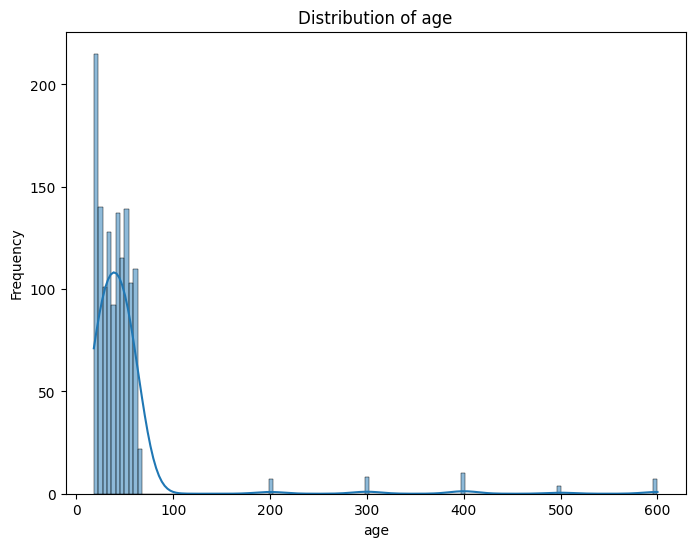

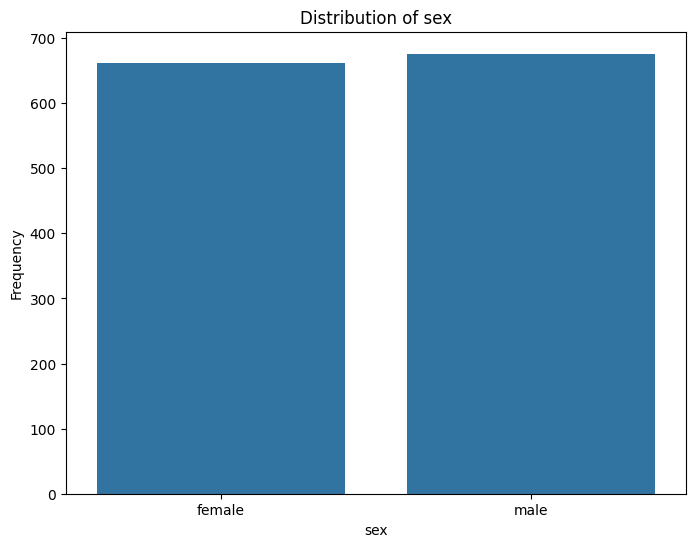

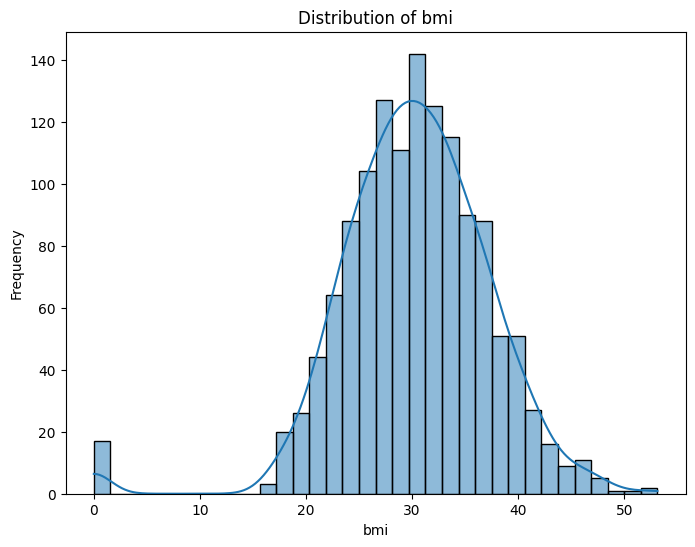

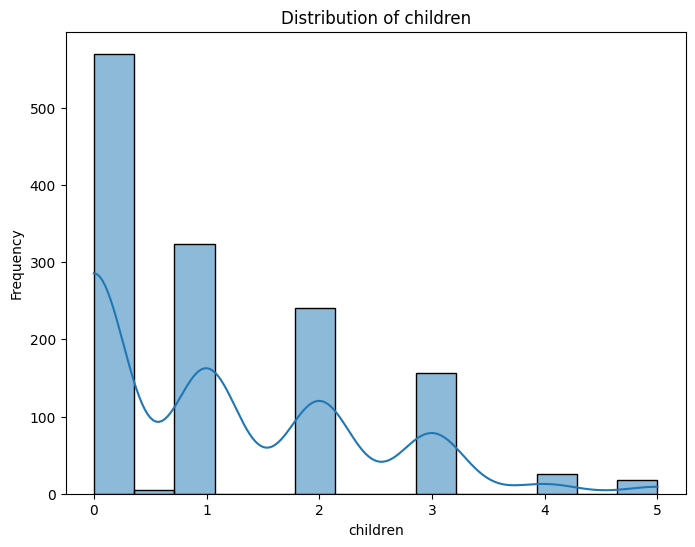

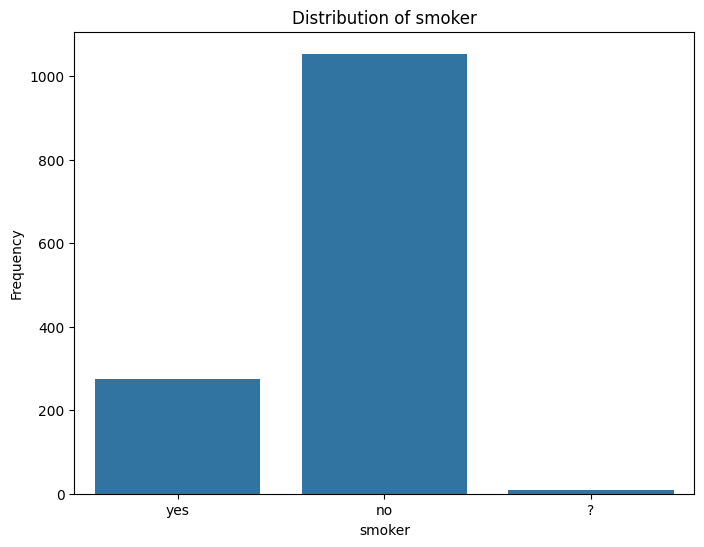

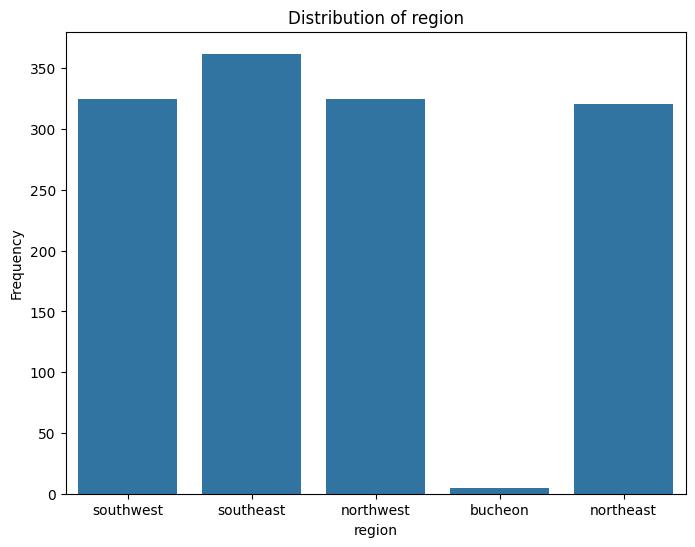

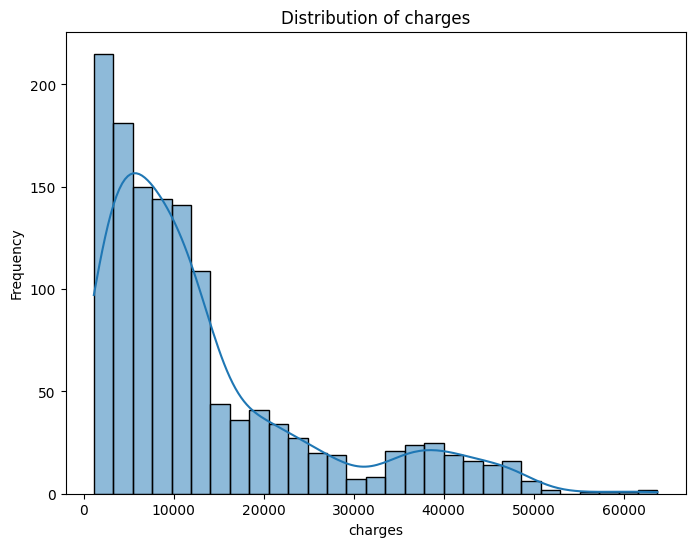

In [6]:
# prompt: df의 모든 컬럼에 대해서 분포를 그려줘

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the previous code

for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    if df[column].dtype in ['int64', 'float64']:  # Numerical columns
        sns.histplot(df[column], kde=True)  # Histogram with KDE
        plt.title(f'Distribution of {column}')
    else:  # Categorical columns
        sns.countplot(x=column, data=df)  # Countplot
        plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
df=df[df['smoker'] != '?']
df=df[df['region'] != 'bucheon']
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1324 rows x 7 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['smoker'].values)
print(y)

[1 0 0 ... 0 0 1]


In [9]:
X=df[['age','sex','bmi','children','region','charges']].values
#le=LabelEncoder()
#X[:,1]=le.fit_transform(X[:,1])

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder(categories='auto',drop='first')
c_tranf=ColumnTransformer([('onehot',ohe,[1,4])],remainder='passthrough')
X=c_tranf.fit_transform(X)
print(X.shape,'\n',X)

(1324, 8) 
 [[0.0 0.0 0.0 ... 27.9 0.0 16884.924]
 [1.0 0.0 1.0 ... 33.77 1.0 1725.5523]
 [1.0 0.0 1.0 ... 33.0 3.0 4449.462]
 ...
 [0.0 0.0 1.0 ... 36.85 0.0 1629.8335]
 [0.0 0.0 0.0 ... 25.8 0.0 2007.945]
 [0.0 1.0 0.0 ... 29.07 0.0 29141.3603]]


In [11]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(X)
X=imr.transform(X)

In [ ]:
# age - replace 'x00' to 'x0'
# bmi - replace '0' to mean
# childern - replace '0.5' to mode
# charges - replace 'nan' to median

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_std,y_train)
print(lr.score(X_test_std,y_test))

0.907035175879397


In [15]:
lr.coef_

array([[ 0.18897509, -0.22990379,  0.        , -0.02492612, -0.20282927,
        -0.98906627, -0.09217427,  3.37708735]])

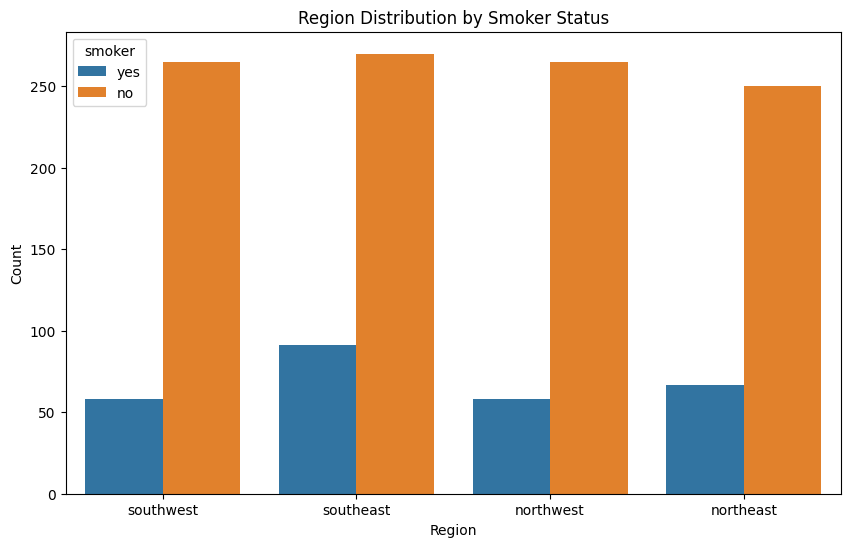

In [ ]:
# prompt: smoker 여부 별로 region 분포 시각화

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Assuming 'df' is your DataFrame and it's already preprocessed

# Create the visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Region Distribution by Smoker Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

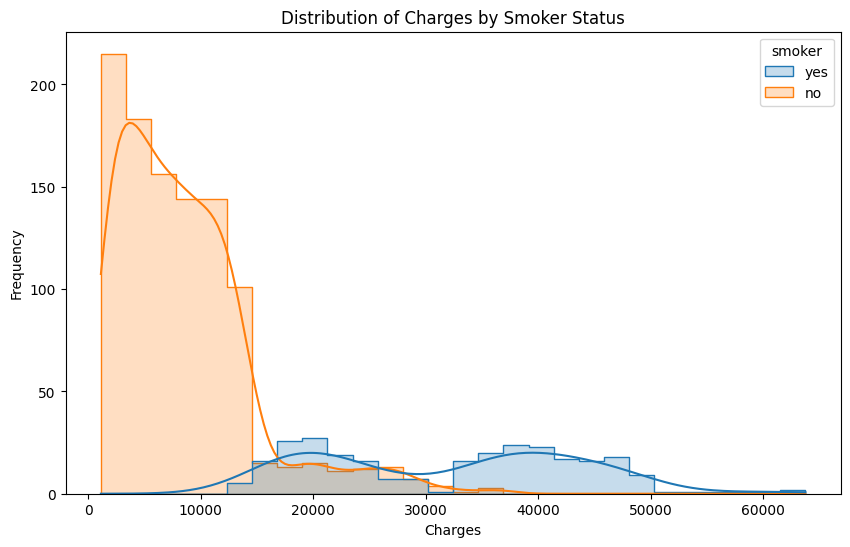

In [ ]:
# prompt: smoker 여부 별로 charge 분포 시각화

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', kde=True, element="step")
plt.title('Distribution of Charges by Smoker Status')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

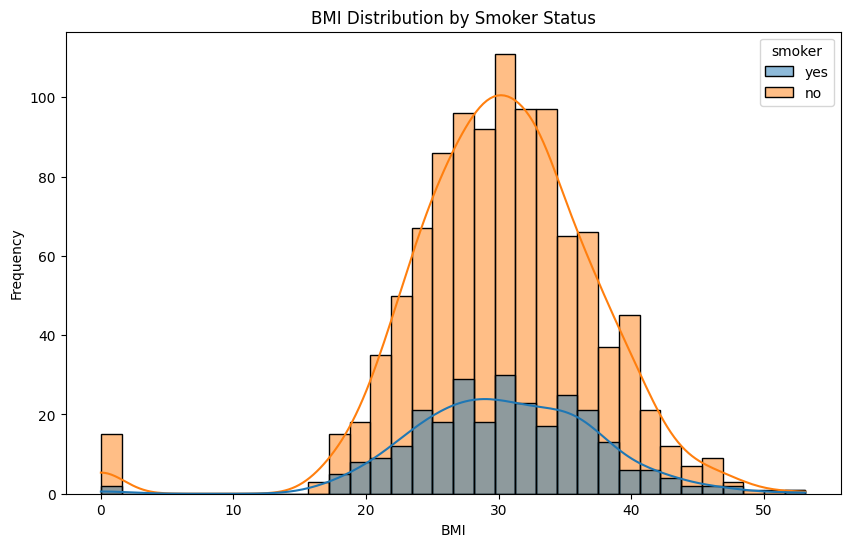

In [ ]:
# prompt: smoker 여부 별로 bmi 분포 시각화

# ... (your existing code) ...

# Visualize BMI distribution by smoker status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='smoker', kde=True)
plt.title('BMI Distribution by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
tree.fit(X_train,y_train)
print(tree.score(X_test_std,y_test))

0.7939698492462312


In [17]:
importances=tree.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.01175728,
       0.11897885, 0.        , 0.86926387])